### This notebook will be used to explore different time-series in order to find interesting insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

% matplotlib inline

In [10]:
conn = sqlite3.connect('db1.sqlite')
c = conn.cursor()

c.execute("SELECT date, close FROM Closing_Prices\
           WHERE symbol = 'CL'\
               AND date BETWEEN '2005-05-12' AND '2005-05-21';")
ts = c.fetchall()
conn.close()

In [26]:
def generate_time_series(product, start_year, end_year, db_file):
    ''' This function takes in a product, start_year, end_year, and database
        file then returns a dataframe of the time-series of closing prices given the parameters.

        Args: product - str product in database we want to create a time-series of closing prices
              start_year - int year to begin time-series
              end_year - int year to end the time-series
              db_file - str database filename

        Return: ts - the closing price time-series of product from start_year to end_year
    '''
    # Connect to database and create query
    conn = sqlite3.connect(db_file)
    query = "SELECT date, close FROM Closing_Prices\
             WHERE symbol = '{p}'\
                 AND date BETWEEN '{sy}-01-01' AND '{ey}-12-31';"\
            .format(p=product, sy=str(start_year), ey=str(end_year))
        
    # Read time-series data into dataframe
    ts = pd.read_sql(query, conn, index_col='date', parse_dates=['date'])
    
    return ts

In [27]:
cl_ts = generate_time_series('CL', 2006, 2007, 'db1.sqlite')

In [28]:
cl_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2006-01-03 to 2007-12-31
Data columns (total 1 columns):
close    501 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


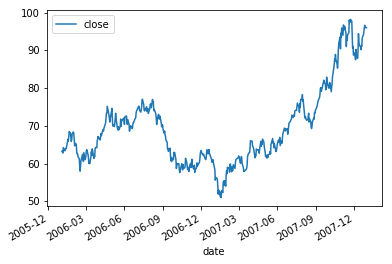

In [30]:
cl_ts.plot()

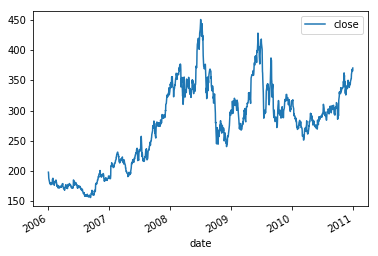

In [31]:
sm_ts = generate_time_series('SM', 2006, 2010, 'db1.sqlite')
sm_ts.plot()

In [44]:
import math
test = math.sqrt(252) * sm_ts.pct_change().rolling(window=25, center=False).std()

In [45]:
test.tail()

,close
date,
2010-12-27,0.215518
2010-12-28,0.189346
2010-12-29,0.182784
2010-12-30,0.173764
2010-12-31,0.176275


In [47]:
sm_ts.head()

,close
date,
2006-01-03,198.2
2006-01-04,195.1
2006-01-05,188.8
2006-01-06,186.9
2006-01-09,183.3


In [48]:
sm_ts['historical_vol'] = math.sqrt(252) * sm_ts.pct_change().rolling(window=20, center=False).std()

In [50]:
sm_ts.tail()

,close,historical_vol
date,,
2010-12-27,366.4,0.182553
2010-12-28,368.6,0.181346
2010-12-29,365.7,0.186442
2010-12-30,365.4,0.171794
2010-12-31,370.3,0.171607


In [51]:
def add_hist_vol(ts, period=20):
    ''' This function takes in a time-series and a period (default to 20) and adds a historical
        volatility column to the time-series, based on the period given.
        
        Args: ts - dataframe time-series of closing price data
              period - int number of days used to calculate the historical vol
        
        Return: ts - dataframe time-series with added hist vol column
    '''
    # Add historical vol column given period length
    ts['{}d_hist_vol'.format(str(period))] = math.sqrt(252) * ts.pct_change().rolling(window=period, center=False).std()
    
    return ts

In [52]:
cl_ts.head()

,close
date,
2006-01-03,63.14
2006-01-04,63.42
2006-01-05,62.79
2006-01-06,64.21
2006-01-09,63.50


In [53]:
cl_updated = add_hist_vol(cl_ts)

In [55]:
cl_ts.tail()

,close,20d_hist_vol
date,,
2007-12-24,94.13,0.356055
2007-12-26,95.97,0.342502
2007-12-27,96.62,0.306066
2007-12-28,96.00,0.308000
2007-12-31,95.98,0.289970
